# Convolution Neural Networks

Here we start of by preparing the images for CNNs with Tensorflow's Keras API.

### Classification of Cats vs Dogs
We download the dataset from kaggle.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
phy_dev = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ", len(phy_dev))
try:
    tf.config.experimental.set_memory_growth(phy_dev[0], True)
except:
    pass

Number of GPUs Available:  0


In [ ]:
parent_path = "E:/Python/libraries/KERAS/Data/dogs-vs-cats/train_dataset/"
sub_dirs = ['train/','test/','valid/']
if os.path.isdir('Data/dogs-vs-cats/train_dataset/train/dogs') is False:
    for sub_dir in sub_dirs:
        label_dirs = ['dogs/','cats/']
        for label_dir in label_dirs:
            new_dir = parent_path + sub_dir + label_dir
            os.makedirs(new_dir)
     
    os.chdir('E:/Python/libraries/KERAS/Data/dogs-vs-cats/train_dataset')
    #if os.path.stat("train/dogs").st_size == 0:
    for dog in random.sample(glob.glob('dog*'), 500):
        shutil.move(dog, 'train/dogs')
    for dog in random.sample(glob.glob('dog*'), 100):
        shutil.move(dog, 'valid/dogs')
    for dog in random.sample(glob.glob('dog*'), 50):
        shutil.move(dog, 'test/dogs')

    for cat in random.sample(glob.glob('cat*'), 500):
        shutil.move(cat, 'train/cats')
    for cat in random.sample(glob.glob('cat*'), 100):
        shutil.move(cat, 'valid/cats')
    for cat in random.sample(glob.glob('cat*'), 50):
        shutil.move(cat, 'test/cats')        

In [ ]:
os.chdir('../../')

In [ ]:
os.chdir('../')

In [5]:
# To check what directory I am in
print(os.getcwd())

E:\Python\libraries\KERAS


In [6]:
path_train_data = 'E:/Python/libraries/KERAS/Data/dogs-vs-cats/train_dataset/train'
path_valid_data = 'Data/dogs-vs-cats/train_dataset/valid'
path_test_data = 'Data/dogs-vs-cats/train_dataset/test'

Since the input data should be in a format compatible with the model, we then do the following

In [7]:
batches_train = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
     .flow_from_directory(directory=path_train_data, target_size=(224,224),classes=['cats','dogs'], batch_size = 10)
batches_valid = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
     .flow_from_directory(directory=path_valid_data, target_size=(224,224),classes=['cats','dogs'], batch_size = 10)
batches_test = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
     .flow_from_directory(directory=path_test_data, target_size=(224,224),classes=['cats','dogs'], batch_size = 10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
# now we start working on training the data
images, labels = next(batches_train)

In [9]:
# simply got it from tensorflow website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20)) 
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

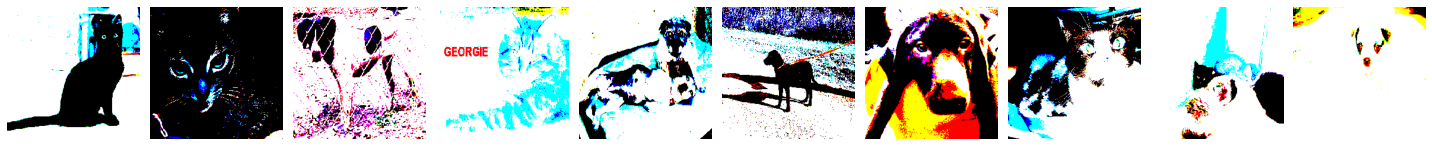

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [10]:
plotImages(images)
print(labels)

The color distortion is due to the way we processed it with the vgg16 model. 
[1 0] represents a cat
[0 1] represents a dog

In [ ]:
# building the model

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
    
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=batches_train, validation_data=batches_valid, epochs=10, verbose=2)

As we see the validation set accuracy is less than that of the training set. This is the problem of overfitting.

The problem of overfitting can be solved by fine tuning the model or using different pretrained models and fine tuning them.

In [ ]:
test_images, test_labels = next(batches_test)
plotImages(test_images)
print(test_labels)

In [ ]:
batches_test.classes

In [ ]:
predictions = model.predict(x=batches_test, verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=batches_test.classes, y_pred=np.argmax(predictions, axis=-1))

In [24]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max()/2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
batches_test.class_indices

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')

### Fine tuning

We use the VGG16 model, which won the 2016 ImageNet Competition.
Advanced fine tuning can be done through transfer learning.

#### VGG16
- __Preprocessing__: Computer the mean red value pixel from all the training data and subtracted it from the red value in each image along the entire training set. Similarly, for the blue and green. Hence, when preprocessed earlier, *the images' color is distorted.*
- The VGG16 model is a functional model(different type than Sequential model.)
- Here, we will be converting the original vgg16 model into a sequential model because the vgg16 model has 1000 neurons in the last layer but since here we only have two classes (cats, dogs), we copy all the layers except the last one and add the needed layer at the end to make our own Sequential model.
- Since the original vgg16 model has already trained on the dogs and cats images, we will not be retraining the trainable parameters(weights, biases) since it's already learned those features. The output layer corresponding to two layers is the only trainable layer. So the trainable parameters must correspond to only the the weights and biases of the last added layer.

In [11]:
# Download the model 
vgg16_model = tf.keras.applications.vgg16.VGG16()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [15]:
# set all the above layers as untrainable
for layer in model.layers:
    layer.trainable = False

In [16]:
# add the last layer as per needed

model.add(Dense(units = 2, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

### Training the Fine-tuned VGG16 model

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x=batches_train, validation_data=batches_valid, epochs=5, verbose=2)

Epoch 1/5
Epoch 1/5
100/100 - 509s - loss: 0.3159 - acc: 0.8650 - val_loss: 0.0997 - val_acc: 0.9700
Epoch 2/5
Epoch 1/5
100/100 - 592s - loss: 0.0797 - acc: 0.9710 - val_loss: 0.0681 - val_acc: 0.9750
Epoch 3/5
Epoch 1/5
100/100 - 563s - loss: 0.0484 - acc: 0.9830 - val_loss: 0.0538 - val_acc: 0.9800
Epoch 4/5
Epoch 1/5
100/100 - 455s - loss: 0.0337 - acc: 0.9920 - val_loss: 0.0516 - val_acc: 0.9800
Epoch 5/5
Epoch 1/5
100/100 - 453s - loss: 0.0256 - acc: 0.9950 - val_loss: 0.0451 - val_acc: 0.9800


In [20]:
# prediction on the test set
predictions = model.predict(x=batches_test, verbose=0)

In [21]:
batches_test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# confusion matrix
cm = confusion_matrix(y_true = batches_test.classes, y_pred = np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[48  2]
 [ 0 50]]


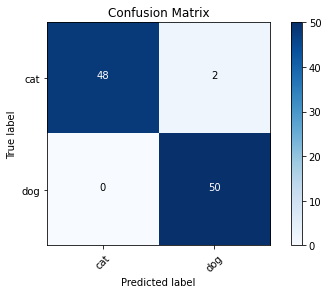

In [25]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')

### Model 3 - MobileNets
The primary advantage of MobileNets on VGG16 is that the former one has a largest size of only 17MB while the latter one on the disk is about 553 MB. Hence, inorder to deploy a model on mobiles, the MibileNets have a predominance.

Though MobileNets have an efficiency of space and time. There is still a tradeoff with the accuracy. MobileNets are not as accurate as VGG16. The tradeoff is really really small though.